# Scipy, la boite à outil

Scipy étant un regroupement d'outils assez divers, ce notebook sera l'occasion de passer *rapidement* en revue ses possibilités. Seul une petite partie des outils seront abordés.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Intégration et dérivation numérique

Les routines sont disponibles dans `scipy.integrate`. Le cas se rencontre lorsque l'on a besoin d'intégrer une grandeur discrète (par exemple, passage de puissance à énergie). C'est l'opération inverse de la dérivée.

Un certain nombre de routines existent, je vais me focaliser sur l'algorithme du trapèze pour l'intégration, et celui des différences finis pour le gradient.

In [ ]:
import scipy.integrate

In [ ]:
data_power = np.loadtxt("../../data/pac_power/1.csv", delimiter=",")
days, hs = map(np.arange, data_power.shape)

In [ ]:
plt.pcolormesh(hs, days, data_power)
plt.colorbar()

### Algorithme du trapèze

Il s'agira simplement d'approcher l'aire sous la courbe avec une approche géométrique. Au lieu d'utiliser des rectangle, on utilisera des trapèze, ce qui augmentera l'ordre d'approximation sans coût supplémentaire.

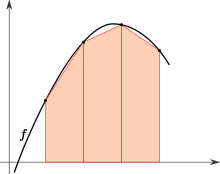

In [ ]:
for day, daily_power in zip(days, data_power):
    print(f"Day {day:02d} spent energy: {scipy.trapz(daily_power / 1000, x=hs):g} kWh")

Il est possible d'avoir accès aux données cumulés avec `cumtrapz`.

In [ ]:
fig, axs = plt.subplots(31, 2, figsize=(8, 16), sharex="all", sharey="col")
for (ax_pow, ax_en), data in zip(axs, data_power):
    ax_pow.plot(hs, data / 1000, color="black")
    ax_en.plot(hs, scipy.integrate.cumtrapz(data / 1000, dx=1, initial=0), color="black")

### Gradient et différences finis

L'opération inverse de l'intégration est le gradient ou la dérivée. Un algorithme simple pour le calculer, fondés sur les développements limités, et la méthode des différences finis. Elle est implémenté dans `np.gradient`.

In [ ]:
power = data_power[0]
energy = scipy.integrate.cumtrapz(power, initial=0)
power_with_grad = np.gradient(energy, edge_order=2)
plt.plot(power)
plt.plot(power_with_grad)

Compte tenu des approximations successives, il y a une perte d'information à chaque fois, en particulier lorsque le nombre de points est réduit..

## Optimisation de base, ajustement de courbe de tendance

L'optimisation mathématique a de nombreuses applications : calibration de modèle (ou de méta-modèles), ajustement de courbe de tendance, résolution de systèmes non linéaires. Les outils disponibles avec `scipy` concernent essentiellement les descentes de gradient et affilié (mais pas que). Pour des méthodes plus exotiques (algo genetique, machine learning, PSO...), d'autres librairies existent.

Le sous module correspondant est `scipy.optimize`

In [ ]:
import numpy as np
import scipy.optimize

### Ajustement de courbe
On va utiliser `curve_fit` pour ajuster une fonction complexe à nos données.

In [ ]:
data_temperature = np.loadtxt("../../data/temperatures_ext_np.csv", delimiter=",")
h = np.arange(24)

In [ ]:
plt.plot(h, data_temperature.mean(axis=1), color="black")
plt.xlim(0, 23)

In [ ]:
def sinusoidal(h, T0, amplitude, ϕ):
    freq = 1 / 24
    return T0 + amplitude * np.cos((h + ϕ) * freq * 2 * np.pi)

In [ ]:
plt.plot(h, sinusoidal(h, 6., 5., ϕ=11.))

In [ ]:
y = data_temperature.mean(axis=1)
sigma = data_temperature.std(axis=1)
(T0, amplitude, ϕ), cov_matrix = scipy.optimize.curve_fit(sinusoidal, h, y, p0=[6., 5., 11.], sigma=sigma)

In [ ]:
print(T0, amplitude, ϕ)

In [ ]:
plt.plot(h, y, color="black", marker="o")
plt.fill_between(h, y + sigma, y - sigma, color="black", alpha=.2)
h_fine = np.linspace(0, 23, 1000)
plt.plot(h_fine, sinusoidal(h_fine, T0, amplitude, ϕ), color="red")
plt.xlim(0, 23)

## Interpolation

In [ ]:
import scipy.interpolate

Il est parfois très utile d'interpoler des valeurs sur une grille, comme lorsqu'il manque des données de capteur ou qu'il faut aligner des données désordonnées. SciPy possède un grand nombre de routine permettant de faire des interpolations 1D, 2D ou plus.

In [ ]:
daily_data_temp = data_temperature[:, 0]
plt.plot(h, daily_data_temp, marker="o", linestyle="", color="red", zorder=10)

interpolant_function = scipy.interpolate.interp1d(h, daily_data_temp)
plt.plot(h_fine, interpolant_function(h_fine))

interpolant_function = scipy.interpolate.interp1d(h, daily_data_temp, kind="cubic")
plt.plot(h_fine, interpolant_function(h_fine))

interpolant_function = scipy.interpolate.interp1d(h, daily_data_temp, kind="nearest")
plt.plot(h_fine, interpolant_function(h_fine))
plt.xlim(10, 15)